In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


(50000, 32, 32, 3)

In [3]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

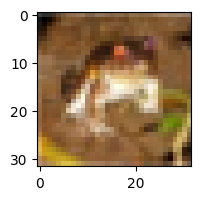

In [4]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[0])

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

Normalizing the training data

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Build simple artificial neural network for image classification

In [6]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 93ms/step - accuracy: 0.3072 - loss: 1.9382
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 92ms/step - accuracy: 0.4246 - loss: 1.6456
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 157s 101ms/step - accuracy: 0.4538 - loss: 1.5532
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 193s 95ms/step - accuracy: 0.4783 - loss: 1.4798
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 199s 93ms/step - accuracy: 0.4949 - loss: 1.4381


In [7]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.44      0.48      1000
           1       0.64      0.43      0.52      1000
           2       0.36      0.38      0.37      1000
           3       0.36      0.30      0.33      1000
           4       0.40      0.47      0.43      1000
           5       0.47      0.30      0.36      1000
           6       0.58      0.46      0.51      1000
           7       0.64      0.45      0.52      1000
           8       0.35      0.85      0.50      1000
           9       0.53      0.46      0.49      1000

    accuracy                           0.45     10000
   macro avg       0.49      0.45      0.45     10000
weighted avg       0.49      0.45      0.45     10000



build a convolutional neural network to train our images

In [8]:

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 48ms/step - accuracy: 0.3748 - loss: 1.7210
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 50ms/step - accuracy: 0.5953 - loss: 1.1600
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 47ms/step - accuracy: 0.6464 - loss: 1.0199
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.6782 - loss: 0.9291
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.7026 - loss: 0.8604
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.7238 - loss: 0.8022
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.7425 - loss: 0.7475
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.7533 - loss: 0.7133
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.7666 - loss: 0.6692
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 48ms/step - accuracy: 0.7767 - loss: 0.6381


In [ ]:
cnn.evaluate(X_test,y_test)